# NLP Analysis of Federal Reserve’s FOMC Statements

### By: Pranaya Rana

In [1]:
#-----------------------------
# Natural Language Toolkit 
import nltk
import datetime
#from datetime import datetime
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, WordPunctTokenizer
import requests #web
from collections import Counter #counting words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string 
#-----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9.71,6)
import matplotlib.cm as cm
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("talk")
np.random.seed(0)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pranayarana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pranayarana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pranayarana/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranayarana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranayarana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### main_dict stores the text of each document. Date is used as a key and values are the text

In [2]:
main_dict = {}
import os
for filename in os.listdir(os.getcwd()):
    #print(filename)
    if filename == ".ipynb_checkpoints" or filename == ".DS_Store" or filename == "Book2.csv" or filename == "Final Project.ipynb" or filename == "Book3.csv":
        continue
    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
        text = f.read()
        #main_dict[filename] = text
        
        if filename== "Final Project.ipynb":
            continue
        item = filename[:8]
        date_time_obj = datetime.datetime.strptime(item, '%Y%m%d')
        ke = date_time_obj.date() 
        main_dict[ke] = text

  

In [3]:
#Order main_dict to have it in chronological order
from collections import OrderedDict
main_dict= OrderedDict(sorted(main_dict.items(), key=lambda t: t[0]))

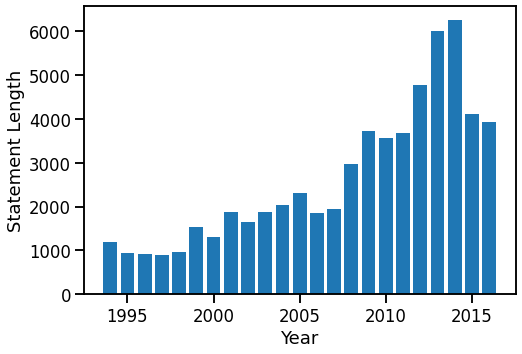

In [4]:
#Plotting the length of each of the documents accross time.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
X = []
Y = []
for item in main_dict:
    X.append(item.year)
    Y.append(len(main_dict[item]))

    #print(str(item.year) + ":"+ str(len(main_dict[item])))
    #print(len(Y))
ax.bar(X,Y)
#ax.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
ax.set_xlabel('Year')
ax.set_ylabel('Statement Length')
plt.show()

In [5]:
#define function to convert raw text into tokens as detailed above
#define function to convert raw text into tokens as detailed above
def preprocessText2Word(raw_text): #tokenize, lowercase, remove stopwords, lemmatize, remove punctuation
    tokenizer      = nltk.tokenize.word_tokenize
    stop_words     = set(nltk.corpus.stopwords.words('english'))
    wnl            = nltk.WordNetLemmatizer()
    #-------
    tokens         = tokenizer(raw_text)                                     #step 2
    tokens_lower   = [ word.lower() for word in tokens if word[0].isalpha()]                     #step 3
    #tokens_stem    = [ porter.stem( t ) for t in tokens_lower ]              #step 4
    tokens_noStop  = [ w for w in tokens_lower if not w in stop_words ]       #step 5 remove stop words
    tokens_lemmatize = [wnl.lemmatize(w) for w in tokens_noStop]
    #tokens_noPunct = [word for word in tokens_noStop if word.isalpha()]      #step 6
    return tokens_lemmatize

#### clean_dict and clean_list store the text after they have been preprocessed.

In [6]:
#Dict and list of cleaned text
clean_dict = {}
clean_list = []
for item in main_dict:
    text = main_dict[item]
    process = preprocessText2Word(text)
    clean_dict[item] = process
    clean_list.append(process)


#### Cosine Similarity

In [7]:
#Create Tuples for cosine similarity
allDocs_processed=tuple(clean_list)

In [8]:
#=======================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# since we want to pre-process the data ourself, we initialize with the following inputs
tfidf    = TfidfVectorizer(max_df = .4,preprocessor=' '.join,lowercase=False)   # initialize the TFIDF vectorizer
tfs_vecs = tfidf.fit_transform(allDocs_processed)                                # vectorize on the training data
#=======================
cos = cosine_similarity(tfs_vecs)

In [9]:
print(len(cosine_similarity(tfs_vecs)))

159


In [10]:
#list of filenames
file_names = []
for item in clean_dict:
    file_names.append(item)

#### Print out simialrity scores that are high enough i.e. > 0.9

In [11]:
print(cos)

[[1.         0.56804196 0.11613575 ... 0.01824525 0.01879792 0.01864088]
 [0.56804196 1.         0.09983538 ... 0.03351593 0.03453118 0.0342427 ]
 [0.11613575 0.09983538 1.         ... 0.04146215 0.0427181  0.04236122]
 ...
 [0.01824525 0.03351593 0.04146215 ... 1.         0.88997466 0.88140587]
 [0.01879792 0.03453118 0.0427181  ... 0.88997466 1.         0.89910886]
 [0.01864088 0.0342427  0.04236122 ... 0.88140587 0.89910886 1.        ]]


In [13]:
for row in range (0,159):
    for col in range (0,159):
        #print(row)
        #print(col)
        item = cos[row][col]
        if item > 0.9 and row != col:
            #print(item)
            print("similarity score: " +str(item)+' row: '+str(file_names[row])+' col: '+str(file_names[col]))

similarity score: 0.9524162349829758 row: 2003-08-12 col: 2003-09-16
similarity score: 0.9502768689870809 row: 2003-08-12 col: 2003-10-28
similarity score: 0.9524162349829758 row: 2003-09-16 col: 2003-08-12
similarity score: 0.9707362518772139 row: 2003-09-16 col: 2003-10-28
similarity score: 0.9502768689870809 row: 2003-10-28 col: 2003-08-12
similarity score: 0.9707362518772139 row: 2003-10-28 col: 2003-09-16
similarity score: 0.9313790109054582 row: 2006-10-25 col: 2006-12-12
similarity score: 0.9313790109054582 row: 2006-12-12 col: 2006-10-25
similarity score: 0.931761297353801 row: 2007-03-21 col: 2007-05-09
similarity score: 0.931761297353801 row: 2007-05-09 col: 2007-03-21
similarity score: 0.9095352574629025 row: 2012-03-13 col: 2012-04-25
similarity score: 0.9095352574629025 row: 2012-04-25 col: 2012-03-13
similarity score: 0.917873941681094 row: 2012-09-13 col: 2012-10-24
similarity score: 0.917873941681094 row: 2012-10-24 col: 2012-09-13
similarity score: 0.9133564138118437 r

In [14]:
#order clean_dict
from collections import OrderedDict
ordered = OrderedDict(sorted(clean_dict.items(), key=lambda t: t[0]))

#### Word clouds
###### Separate cloud for separate time segments

In [15]:
five_dict={}
text_1994_1999 = ""
text_2000_2005 = ""
text_2006_2011 = ""
text_2012_2016 = ""
for date in ordered:
    date_str = str(date)
    year = date_str[:4]
    year = int(year)
    #print(year)
    txt = ""
    for item in ordered[date]:
        txt = txt + ' ' + item
    if year > 1993 and year < 2000:
        text_1994_1999 = text_1994_1999 + txt
    if year > 1999 and year < 2006:
        text_2000_2005 = text_2000_2005 + txt
    if year > 2005 and year < 2012:
        text_2006_2011 = text_2006_2011 + txt
    if year > 2011 and year < 2017:
        text_2012_2016 = text_2012_2016 + txt
        

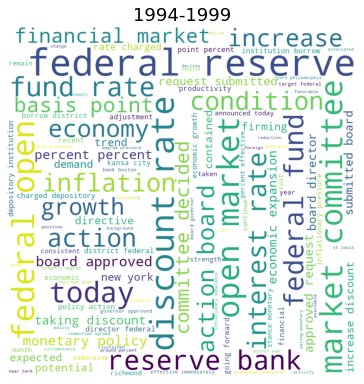

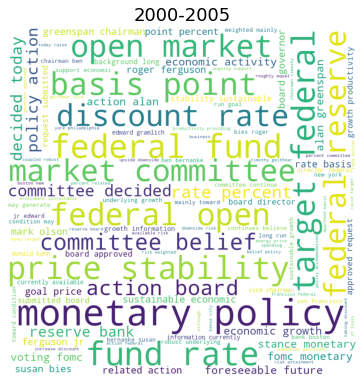

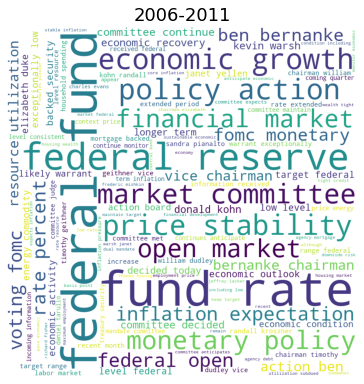

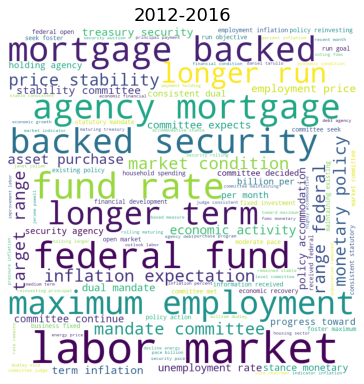

<Figure size 720x720 with 0 Axes>

In [16]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

wordcloud_1999 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_1994_1999) 

wordcloud_2005 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_2000_2005) 

wordcloud_2011 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_2006_2011) 

wordcloud_2016 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_2012_2016) 

# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.subplot(2, 2, 1).set_title("1994-1999")
#plt.plot()
plt.imshow(wordcloud_1999) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.subplot(2, 2, 2).set_title("2000-2005")
#plt.plot()
plt.imshow(wordcloud_2005) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.subplot(2, 2, 3).set_title("2006-2011")
#plt.plot()
plt.imshow(wordcloud_2011) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.subplot(2, 2, 4).set_title("2012-2016")
#plt.plot()
plt.imshow(wordcloud_2016) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (10, 10), facecolor = None) 
plt.show() 

#### Machine Learning models

Load CSV file that stores the target label as to whether the federal funds rate (FFR) in a certain time is high or low. High or low classification is based on the historic median value of (4.26%). The label is stored in the cloumn median and is coded as 1 if the FFR is high (greater than 4.26) and 0 if it is low (less than 4.26).


In [54]:
#Loading Data set
#dta = pd.read_csv("Book2.csv")
dta = pd.read_csv("Book3.csv")
dta.head()

,Date,Change,Median
0,2/4/94,1,1
1,3/22/94,1,1
2,5/17/94,1,1
3,8/16/94,1,1
4,11/15/94,1,1


In [55]:
#bin_var = dta['Change']
bin_var = dta['Median']
date_var = dta['Date']

In [56]:
print(bin_var)

0      1
1      1
2      1
3      1
4      1
      ..
154    0
155    0
156    0
157    0
158    0
Name: Median, Length: 159, dtype: int64


In [57]:
#define function to convert raw text into tokens as detailed above
tokenizer      = nltk.tokenize.word_tokenize
stop_words     = set(nltk.corpus.stopwords.words('english'))
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stemmer        = nltk.stem.PorterStemmer()
wnl            = nltk.WordNetLemmatizer()
def cleanText(raw_text): #tokenize, lowercase, remove stopwords, removePunctuation, lemmatize
    tokens         = tokenizer(raw_text)                                #step 1    
    tokens         = [ word.lower() for word in tokens ]                #step 2
    tokens         = [ w for w in tokens if not w in stop_words ]       #step 3
    tokens         = [ w for w in tokens if w.isalpha() ]               #step 4
    tokens         = [ wnl.lemmatize ( t ) for t in tokens ]            #step 5
    text           = ' '.join(tokens)
    return text

In [58]:
#Converting the document to a cleanText form where they are not broken down to tokens. 
new_dic = {}
new_lis = []
for item in main_dict:
    #print(item)
    clean = cleanText(main_dict[item])
    new_dic[item] = clean
    new_lis.append(clean)
    

In [59]:
#Create a data frame out of the cleanText and target label.
data_1 = {'date': date_var,'text': new_lis,'target':bin_var}
df_1 = pd.DataFrame(data_1)

In [60]:
df_1

,date,text,target
0,2/4/94,chairman alan greenspan announced today federa...,1
1,3/22/94,chairman alan greenspan announced today federa...,1
2,5/17/94,federal reserve today announced two action des...,1
3,8/16/94,federal reserve announced today following mone...,1
4,11/15/94,federal reserve board today approved increase ...,1
...,...,...,...
154,1/27/16,information received since federal open market...,0
155,3/16/16,information received since federal open market...,0
156,4/27/16,information received since federal open market...,0
157,6/15/16,information received since federal open market...,0


In [61]:
df_1.to_csv('df_1_main.csv')

0    112
1     47
Name: target, dtype: int64


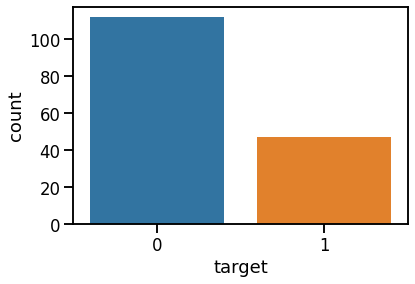

In [62]:
print(df_1['target'].value_counts())
ax =sns.countplot(x=df_1['target']); 
plt.show()

### Oversampling before train/test split.

Random over-sampling:
0    112
1    112
Name: target, dtype: int64


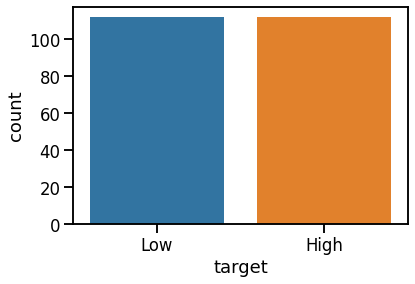

In [63]:
# Balance two classes using oversampling
df_class_1    = df_1[df_1['target'] == 1] #class with fewer samples
df_class_0    = df_1[df_1['target'] == 0] #class with more samples
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)
class_names = ['Low','High']

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over         = pd.concat([df_class_1_over, df_class_0], axis=0)
print('Random over-sampling:')
print(df_over.target.value_counts())
#plot
ax = sns.countplot(x=df_over['target']); 
ax.set_xticklabels(class_names)
plt.show()


In [64]:
df_over

,date,text,target
16,11/16/99,federal open market committee today voted rais...,1
24,11/15/00,federal open market committee meeting today de...,1
29,4/18/01,federal open market committee decided today lo...,1
21,6/28/00,federal open market committee meeting today de...,1
85,10/31/07,federal open market committee decided today lo...,1
...,...,...,...
154,1/27/16,information received since federal open market...,0
155,3/16/16,information received since federal open market...,0
156,4/27/16,information received since federal open market...,0
157,6/15/16,information received since federal open market...,0


In [65]:
df_over.to_csv('df_over_before.csv')

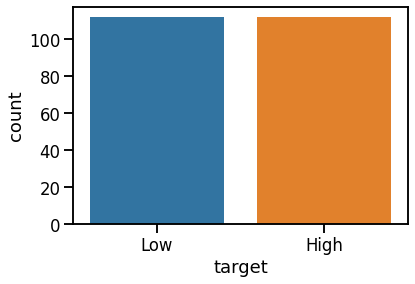

In [66]:
#plot
ax = sns.countplot(x=df_over['target']); 
ax.set_xticklabels(class_names)
plt.show()

In [67]:
# splitting training data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV
#Y = df_over['target']
Y = df_over['target']
#X = [d for d in df_over['text']]
X = [d for d in df_over['text']]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=325)

### Naive Bayes

In [68]:
#define pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), #define our vectorizer
    ('clf', MultinomialNB()),      #define our classifier
])

parameters = {
    'tfidf__min_df': (0,1,0.001),
    'tfidf__max_df': (0.4,0.5,0.6,1.0),
    'tfidf__max_features': [1000, None],
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
}

grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3);



In [69]:
import time
start_time = time.time()
grid.fit(X_train,y_train);
print("GridSearch took %3.2f seconds " % (time.time() - start_time)) #took about 72s

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearch took 5.41 seconds 


In [70]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)

Best Score:  0.9423076923076924
Best Params:  {'tfidf__max_df': 0.4, 'tfidf__max_features': None, 'tfidf__min_df': 0, 'tfidf__ngram_range': (1, 2)}


In [71]:
model = grid.best_estimator_  #should already be trained/fit
#model.fit(X_train,y_train)

In [72]:
tf_idf = model['tfidf']
feature_names = tf_idf.get_feature_names()
print(len(feature_names))

6811


In [73]:
# evaluate the performance and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))

Accuracy : 97.06 %


In [74]:
# evaluate the performance and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))

Accuracy : 97.06 %


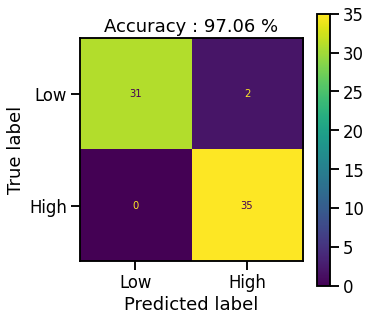

In [75]:
class_names = ['Low','High']
fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm, display_labels=class_names) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

### Oversampling of training data after train/test split.

In [76]:
#New stuff. May 4th
# splitting training data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV
Y = df_1['target']
X = [d for d in df_1['text']]
Date = [d for d in df_1['date']]
X_train,X_test,Date_train,Date_test,y_train,y_test = train_test_split(X,Date,Y,test_size=.3, random_state=325)

In [77]:
data_train = {'date': Date_train,'text': X_train,'target':y_train}
df_train = pd.DataFrame(data_train)

0    80
1    31
Name: target, dtype: int64


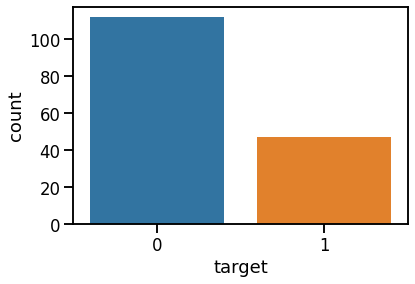

In [78]:
print(df_train['target'].value_counts())
ax =sns.countplot(x=df_1['target']); 
plt.show()

80
31
Random over-sampling:
0    80
1    80
Name: target, dtype: int64


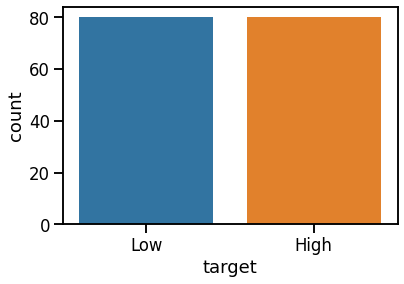

In [79]:
# Balance two classes using oversampling
df_class_1    = df_train[df_train['target'] == 1] #class with fewer samples
df_class_0    = df_train[df_train['target'] == 0] #class with more samples
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)
print(count_class_0)
print(count_class_1)
class_names = ['Low','High']

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over         = pd.concat([df_class_1_over, df_class_0], axis=0)
print('Random over-sampling:')
print(df_over.target.value_counts())
#plot
ax = sns.countplot(x=df_over['target']); 
ax.set_xticklabels(class_names)
plt.show()

In [80]:
df_over

,date,text,target
11,11/17/98,federal reserve today announced following set ...,1
11,11/17/98,federal reserve today announced following set ...,1
77,1/31/07,federal open market committee decided today ke...,1
77,1/31/07,federal open market committee decided today ke...,1
71,5/10/06,federal open market committee decided today ra...,1
...,...,...,...
90,3/18/08,federal open market committee decided today lo...,0
137,12/18/13,information received since federal open market...,0
110,8/10/10,information received since federal open market...,0
47,5/6/03,federal open market committee decided keep tar...,0


In [81]:
df_over.to_csv('df_over_after_training_only.csv')

In [82]:
X_train = [d for d in df_over['text']]
y_train = df_over['target']


In [83]:
#define pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), #define our vectorizer
    ('clf', MultinomialNB()),      #define our classifier
])

parameters = {
    'tfidf__min_df': (0,1,0.001),
    'tfidf__max_df': (0.4,0.5,0.6,1.0),
    'tfidf__max_features': [1000, None],
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
}

grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3);


In [84]:
import time
start_time = time.time()
grid.fit(X_train,y_train);
print("GridSearch took %3.2f seconds " % (time.time() - start_time)) #took about 72s

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearch took 3.17 seconds 


In [85]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)

Best Score:  0.9310505474027487
Best Params:  {'tfidf__max_df': 1.0, 'tfidf__max_features': None, 'tfidf__min_df': 0, 'tfidf__ngram_range': (1, 2)}


In [86]:
model = grid.best_estimator_  #should already be trained/fit
#model.fit(X_train,y_train)

In [87]:
tf_idf = model['tfidf']
feature_names = tf_idf.get_feature_names()
print(len(feature_names))

6455


In [88]:
# evaluate the performance and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))


Accuracy : 97.92 %


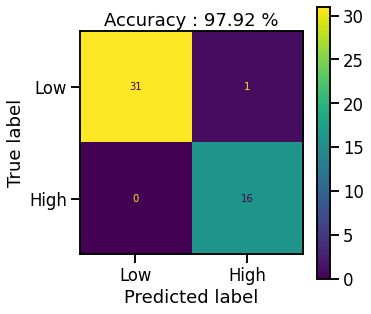

In [89]:
class_names = ['Low','High']
fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm, display_labels=class_names) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

### Naive Bayes without oversampling/undersampling.

In [90]:
# splitting training data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV
#Y = df_over['target']
Y = df_1['target']
#X = [d for d in df_over['text']]
X = [d for d in df_1['text']]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3, random_state=325)

In [91]:
#define pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), #define our vectorizer
    ('clf', MultinomialNB()),      #define our classifier
])

parameters = {
    'tfidf__min_df': (0,1,0.001),
    'tfidf__max_df': (0.4,0.5,0.6,1.0),
    'tfidf__max_features': [1000, None],
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
}

grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3);


In [92]:
import time
start_time = time.time()
grid.fit(X_train,y_train);
print("GridSearch took %3.2f seconds " % (time.time() - start_time)) #took about 72s

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearch took 2.76 seconds 


In [93]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)

Best Score:  0.8828828828828829
Best Params:  {'tfidf__max_df': 0.4, 'tfidf__max_features': 1000, 'tfidf__min_df': 0, 'tfidf__ngram_range': (1, 1)}


In [94]:
model = grid.best_estimator_  #should already be trained/fit
#model.fit(X_train,y_train)
tf_idf = model['tfidf']
feature_names = tf_idf.get_feature_names()
print(len(feature_names))

1000


In [95]:
# evaluate the performance and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred=model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))

Accuracy : 91.67 %


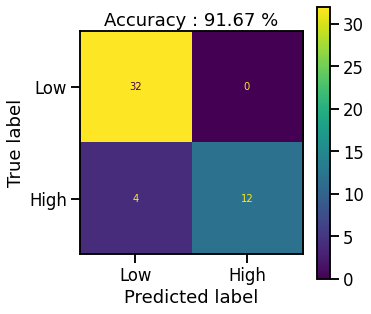

In [96]:
class_names = ['Low','High']
fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm, display_labels=class_names) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

#### Decision tree

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [143]:
# splitting training data into train and test
from sklearn.model_selection import train_test_split, GridSearchCV
#Y = df_over['target']
Y = df_1['target']
#X = [d for d in df_over['text']]
X = [d for d in df_1['text']]

In [144]:
cv = CountVectorizer(max_features = 1500)
X_1 = cv.fit_transform(X).toarray()

In [145]:
features = cv.get_feature_names()

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X_1,Y,test_size=.3, random_state=325)

In [147]:
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [148]:
#y_pred_DT = classifier.predict(X_test)
predicted = classifier.predict(X_test)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

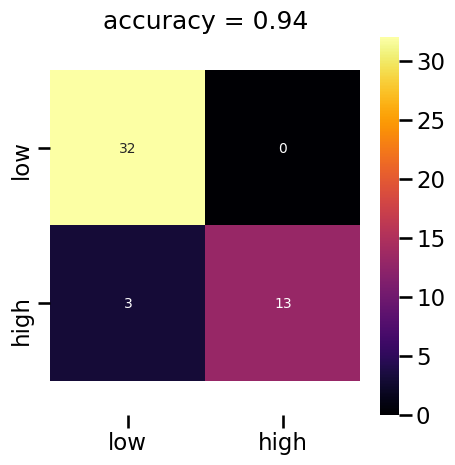

In [149]:
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,xticklabels = class_names,yticklabels = class_names,cmap = "inferno")
plt.title('accuracy = %2.2f'%acc)
ax.axis('equal')
plt.show()

In [150]:
feature_imp = pd.Series(classifier.feature_importances_).sort_values(ascending=False)
feature_imp = feature_imp.nlargest(n=5, keep='first')
print(feature_imp.index)

Int64Index([923, 1276, 20, 720, 523], dtype='int64')


In [151]:
top_feats = [features[923],features[1276],features[20],features[720],features[523]]

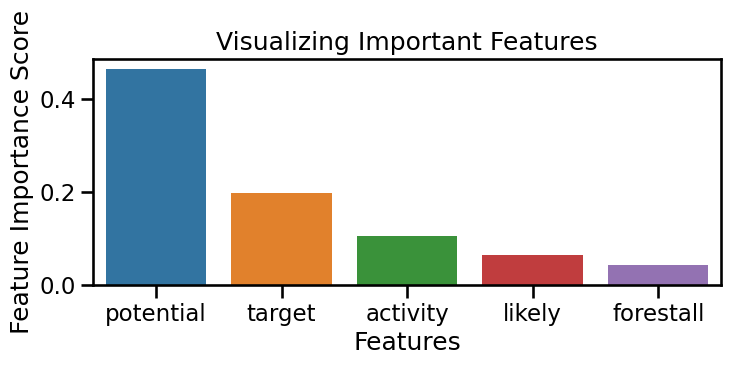

In [152]:

# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=top_feats, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

In [153]:
class_names = ["low", "high"]

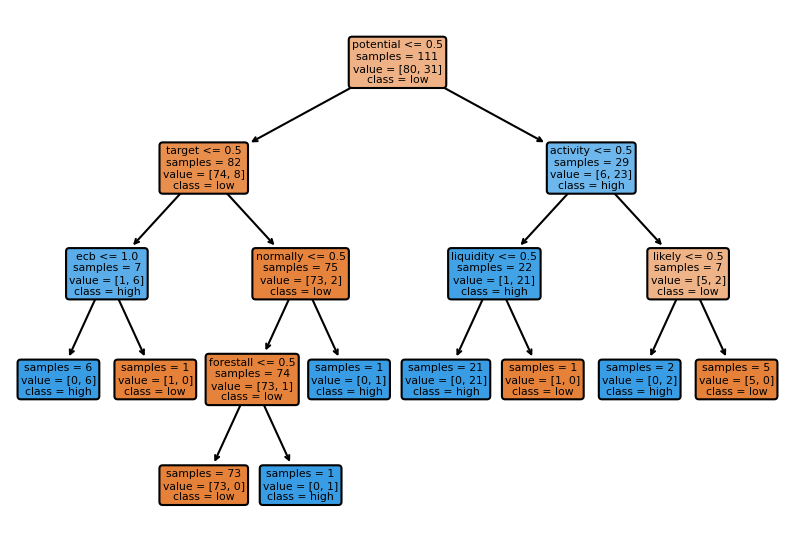

In [154]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=100)
tree.plot_tree(classifier,feature_names = features, class_names = class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

#### Sentiment Analysis

In [114]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
senti = SentimentIntensityAnalyzer()
for item in main_dict:    
    text = main_dict[item]
    #print(text)
    sent = senti.polarity_scores(text)
    print(sent)

{'neg': 0.069, 'neu': 0.861, 'pos': 0.07, 'compound': 0.0352}
{'neg': 0.049, 'neu': 0.781, 'pos': 0.17, 'compound': 0.6597}
{'neg': 0.01, 'neu': 0.853, 'pos': 0.137, 'compound': 0.9682}
{'neg': 0.019, 'neu': 0.849, 'pos': 0.131, 'compound': 0.9589}
{'neg': 0.011, 'neu': 0.829, 'pos': 0.159, 'compound': 0.9705}
{'neg': 0.011, 'neu': 0.814, 'pos': 0.175, 'compound': 0.9747}
{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.024, 'neu': 0.898, 'pos': 0.078, 'compound': 0.6013}
{'neg': 0.015, 'neu': 0.866, 'pos': 0.119, 'compound': 0.9335}
{'neg': 0.082, 'neu': 0.846, 'pos': 0.072, 'compound': 0.128}
{'neg': 0.061, 'neu': 0.845, 'pos': 0.094, 'compound': 0.5709}
{'neg': 0.04, 'neu': 0.904, 'pos': 0.055, 'compound': 0.5106}
{'neg': 0.037, 'neu': 0.832, 'pos': 0.131, 'compound': 0.9481}
{'neg': 0.095, 'neu': 0.744, 'pos': 0.161, 'compound': 0.8831}
{'neg': 0.044, 'neu': 0.874, 'pos': 0.082, 'compound': 0.8689}
{'neg': 0.07, 'neu': 0.825, 'pos': 0.105, 'compound': 0.8628}

{'neg': 0.046, 'neu': 0.812, 'pos': 0.142, 'compound': 0.9972}
{'neg': 0.046, 'neu': 0.819, 'pos': 0.135, 'compound': 0.9967}
{'neg': 0.04, 'neu': 0.812, 'pos': 0.148, 'compound': 0.9983}
{'neg': 0.042, 'neu': 0.814, 'pos': 0.145, 'compound': 0.998}
{'neg': 0.038, 'neu': 0.817, 'pos': 0.145, 'compound': 0.9986}
{'neg': 0.037, 'neu': 0.818, 'pos': 0.145, 'compound': 0.9985}
{'neg': 0.03, 'neu': 0.829, 'pos': 0.142, 'compound': 0.9987}
{'neg': 0.022, 'neu': 0.832, 'pos': 0.147, 'compound': 0.9988}
{'neg': 0.02, 'neu': 0.835, 'pos': 0.145, 'compound': 0.9987}
{'neg': 0.013, 'neu': 0.868, 'pos': 0.119, 'compound': 0.9978}
{'neg': 0.012, 'neu': 0.872, 'pos': 0.116, 'compound': 0.998}
{'neg': 0.019, 'neu': 0.89, 'pos': 0.091, 'compound': 0.9929}
{'neg': 0.031, 'neu': 0.892, 'pos': 0.077, 'compound': 0.985}
{'neg': 0.023, 'neu': 0.889, 'pos': 0.088, 'compound': 0.9874}
{'neg': 0.026, 'neu': 0.876, 'pos': 0.098, 'compound': 0.9915}
{'neg': 0.021, 'neu': 0.89, 'pos': 0.089, 'compound': 0.9883}


It can be seen that all the statements are highly neutral, as one would expect them to be.

In [115]:
#Create a dict that stores the positive sentiment scores
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
analyser = SentimentIntensityAnalyzer()
senti = SentimentIntensityAnalyzer()
senti_dict = {}
for row in df_1.iterrows(): 
    text = row[1]['text']
    date = row[1]['date']
    date_form = datetime.strptime(date,'%m/%d/%y')
    sent = senti.polarity_scores(text)
    #text = clean_dict_new_1[item]
    sent = senti.polarity_scores(text)
    pos = sent['pos']
    senti_dict[date_form] = pos

Text(0, 0.5, 'Positivity')

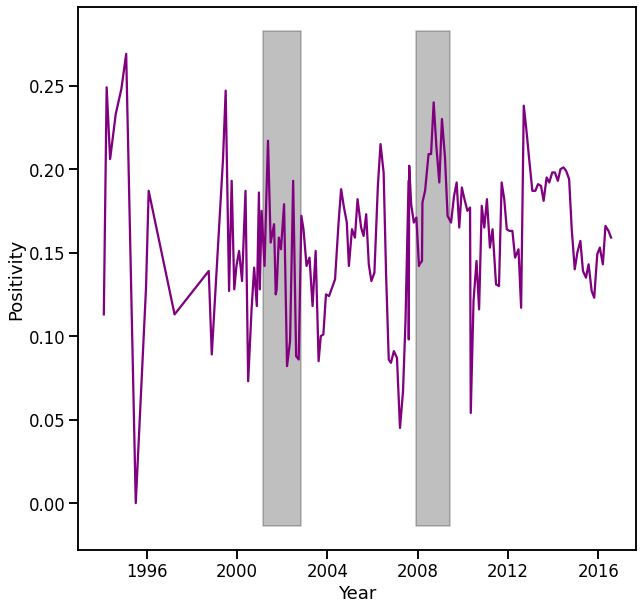

In [116]:
#Plot a line graph of positive sentiment accross time.

#Recession dates
x1 = [datetime(2001, 3, 1, 0, 0), datetime(2002, 11, 1, 0, 0)]
x2 = [datetime(2007, 12, 1, 0, 0), datetime(2009, 6, 1, 0, 0)]


date_list = []
pos_list = []
for item in senti_dict:
    date_list.append(item)
    pos_list.append(senti_dict[item])
fig, ax = plt.subplots(figsize=(10, 10))

#ax.bar(date_list,
    #    pos_list,
      #  color='purple')

ax.plot(date_list,
        pos_list,
        color='purple')

y1, y2 = ax.get_ylim()
ax.fill_between(x1, y1,y2,alpha=.25,color='k')
ax.fill_between(x2, y1,y2,alpha=.25,color='k')
ax.set_xlabel("Year")
ax.set_ylabel("Positivity")

Too much noise in this figure. Hence I attempt to plot only the average positive sentiment for each year:

In [117]:
from collections import defaultdict
avg_dict = defaultdict(list)
for item in senti_dict:
    y = item.year
    avg_dict[y].append(senti_dict[item])

In [118]:
import statistics
list_year = []
list_year_senti = []
for year in avg_dict:
    avg = statistics.mean(avg_dict[year])
    list_year.append(year)
    list_year_senti.append(avg)

Text(0, 0.5, 'Positivity')

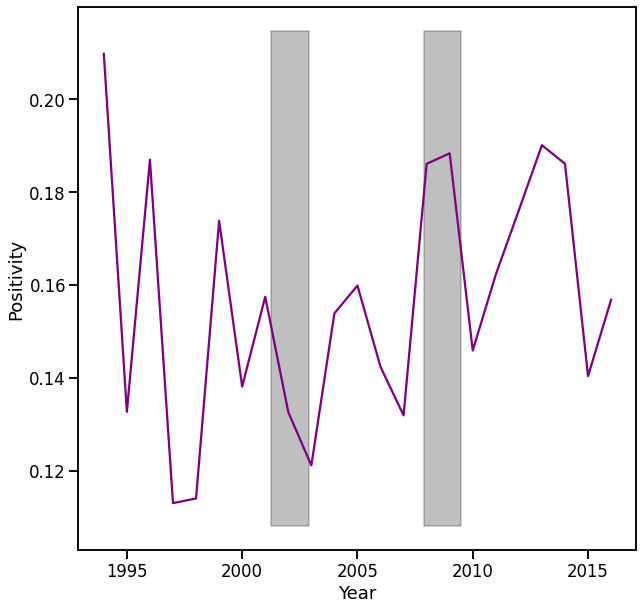

In [119]:
x1 = [2001.25, 2002.9]
x2 = [2007.9, 2009.5]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(list_year,
        list_year_senti,
        color='purple')

#ax.plot(date_list,
       # pos_list,
       # color='purple')

y1, y2 = ax.get_ylim()
ax.fill_between(x1, y1,y2,alpha=.25,color='k')
ax.fill_between(x2, y1,y2,alpha=.25,color='k')
ax.set_xlabel("Year")
ax.set_ylabel("Positivity")

#### Extra (Rough work): Visualizing a TF-IDF vector

In [120]:
list_cleantext = df_1['text']

In [121]:
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(list_cleantext)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df_2 = pd.DataFrame(lst1, columns=feature_names)
df_2

,abate,abating,ability,abroad,absence,absent,accelerated,accelerates,accelerating,accommodate,...,winding,window,winter,work,worker,working,written,year,yellen,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068164,0.000000,0.081351
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.079519
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.090168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034564,0.034846,0.000000
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035039,0.000000
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034357,0.034638,0.000000
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036058,0.036352,0.000000


In [122]:
#Word cloud based on TFIDF vectorizer
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df_2.T.sum(axis=1))

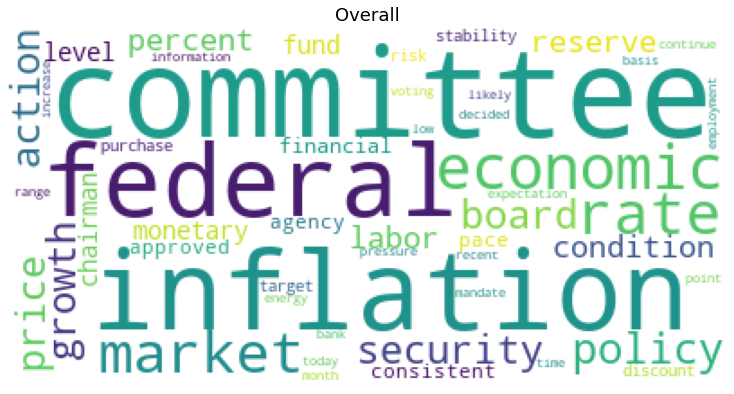

In [123]:
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.subplot(1, 1, 1).set_title("Overall")
#plt.plot()
plt.imshow(Cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
